In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn .model_selection import train_test_split;
import gc
import cv2


In [67]:
digits=pd.read_csv("train.csv")
digits.info()
digits.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
four=digits.iloc[4,1:]
four.shape

(784,)

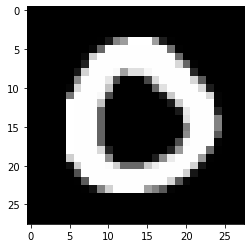

In [70]:
four=four.values.reshape(28,28)
plt.imshow(four,cmap='gray')


In [71]:
print(four[5:-5,5:-5])

[[  0   0   0   8 103 253 253 253 253 253 253 253 253 114   2   0   0   0]
 [  0   0  11 208 253 253 253 253 253 253 253 253 253 253 107   0   0   0]
 [  0   0  31 253 253 253 253 253 253 253 253 253 253 253 215 101   3   0]
 [  0  23 210 253 253 253 248 161 222 222 246 253 253 253 253 253  39   0]
 [  0 136 253 253 253 229  77   0   0   0  70 218 253 253 253 253 215  91]
 [  5 214 253 253 253 195   0   0   0   0   0 104 224 253 253 253 253 215]
 [116 253 253 253 247  75   0   0   0   0   0   0  26 200 253 253 253 253]
 [254 253 253 253 195   0   0   0   0   0   0   0   0  26 200 253 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0  25 231 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0   0 223 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0   0 127 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0   0 139 253 253]
 [254 253 253 253  99   0   0   0   0   0   0   0   0   0  78 248 253 253]
 [254 253 253 253 216  34

In [72]:
digits.label.astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [73]:
100*(round(digits.label.astype('category').value_counts()/len(digits.index),4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [74]:
description=digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [56]:
x=digits.iloc[:,1:]
y=digits.iloc[:,0]
from sklearn.preprocessing import scale
x=scale(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.10,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


In [76]:
from sklearn import svm
from sklearn import metrics
svm_linear=svm.SVC(kernel='linear')
svm_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [81]:
predictions=svm_linear.predict(x_test)
predictions[:10]

array([5, 0, 2, 7, 7, 9, 4, 3, 5, 3])

In [83]:
confusion=metrics.confusion_matrix(y_true=y_test,y_pred=predictions)
confusion

array([[3560,    0,   17,   15,   14,   41,   49,    8,   11,    2],
       [   0, 4139,   25,   13,    2,   16,    5,   11,   25,    3],
       [  50,   26, 3361,   76,   64,   11,   50,   39,   68,   10],
       [  26,   24,  113, 3442,    8,  140,    8,   41,  101,   22],
       [  13,   20,   28,    8, 3378,   11,   21,   13,   11,  155],
       [  33,   35,   40,  196,   37, 2954,   59,    7,   63,   21],
       [  49,   13,   51,    9,   34,   48, 3495,    0,    7,    0],
       [   4,   38,   42,   34,   69,    4,    2, 3602,    7,  130],
       [  33,   93,   95,  148,   28,  107,   36,   31, 3028,   46],
       [  27,   18,   24,   58,  177,   21,    1,  175,   29, 3248]])

In [85]:
metrics.accuracy_score(y_true=y_test,y_pred=predictions)

0.9049470899470899

In [87]:
print(metrics.classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3717
           1       0.94      0.98      0.96      4239
           2       0.89      0.90      0.89      3755
           3       0.86      0.88      0.87      3925
           4       0.89      0.92      0.90      3658
           5       0.88      0.86      0.87      3445
           6       0.94      0.94      0.94      3706
           7       0.92      0.92      0.92      3932
           8       0.90      0.83      0.87      3645
           9       0.89      0.86      0.88      3778

    accuracy                           0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800

